In [4]:
import os
import pandas as pd
import numpy as np
import IPython.display as ipd
from glob import glob
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import librosa
from librosa import display
import mir_eval
from pathlib import Path

In [3]:
## Matplotlib
plt.rc("figure", figsize=(16, 8))

In [7]:
notes_path = Path(r'/Users/ewaissbluth/Documents/GitHub/tensor-hero/Training Data/Training Data/Processed/Anti Hero/Brand New - Degausser (Chezy)/notes_simplified.npy')
notes = np.load(notes_path)

In [8]:
len(notes)

33440

### Load Music

In [9]:
song_path = r'/Users/ewaissbluth/Documents/GitHub/tensor-hero/Training Data/Training Data/Unprocessed/Anti Hero/Brand New - Degausser (Chezy)/song.ogg'
y, sr = librosa.load(song_path)

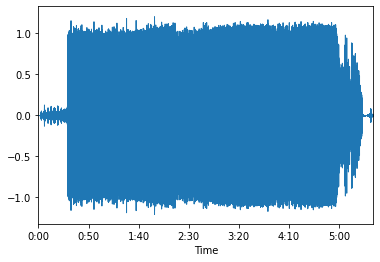

In [10]:
librosa.display.waveplot(y, sr);

In [ ]:
# Audio data information
print("Shape=", y.shape)
print("Sample rate fs=", sr)
print("Audio Length in seconds=%d [s]" % (y.shape[0]/sr))

### Sample

In [12]:
#sample
x, fs = librosa.load(song_path, sr = None, mono = True, duration= 60)

In [13]:
print(x.shape)
print(fs)

(2646000,)
44100


In [14]:
ipd.Audio(x, rate = fs)

In [15]:
y_harmonic, y_percussive = librosa.effects.hpss(x, margin=2.0)

In [ ]:
ipd.Audio(y_harmonic, rate = fs)

In [ ]:
type(y_harmonic)

In [ ]:
ipd.Audio(y_percussive, rate = fs)

In [16]:
hop_len = 512
onset_frame_backtrack = librosa.onset.onset_detect(y_harmonic, sr = fs, hop_length = hop_len, backtrack=True)
print(onset_frame_backtrack)

[ 147  179  187  207  211  231  264  283  301  319  336  360  372  388
  407  424  441  462  475  480  495  515  533  589  605  624  639  659
  675  694  713  730  748  765  780  783  819  838  856  872  890  911
  929  946  964  980 1000 1017 1036 1051 1055 1071 1090 1109 1129 1146
 1164 1180 1198 1215 1234 1250 1269 1287 1293 1323 1329 1341 1344 1359
 1397 1429 1448 1471 1482 1502 1506 1520 1540 1557 1575 1592 1611 1623
 1629 1646 1682 1709 1719 1735 1756 1773 1788 1807 1816 1826 1845 1865
 1880 1897 1915 1934 1968 1985 2002 2039 2056 2077 2112 2131 2150 2154
 2167 2173 2184 2200 2220 2227 2258 2263 2274 2295 2311 2332 2347 2363
 2399 2404 2421 2440 2454 2474 2486 2490 2500 2508 2508 2524 2530 2534
 2543 2561 2579 2585 2599 2615 2631 2652 2657 2669 2687 2706 2715 2725
 2741 2760 2778 2782 2795 2813 2816 2830 2847 2852 2867 2886 2903 2919
 2940 2954 2973 2978 2992 2997 3010 3029 3045 3052 3064 3066 3070 3073
 3082 3098 3105 3117 3122 3136 3139 3153 3163 3171 3192 3207 3225 3231
 3243 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


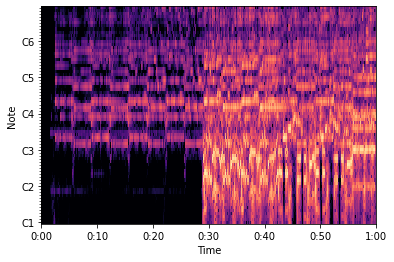

In [17]:
C = librosa.cqt(y_harmonic, sr = fs, fmin = librosa.note_to_hz('C1'), n_bins = 72, bins_per_octave = 12)
librosa.display.specshow(librosa.amplitude_to_db(C, ref = np.max), 
                         sr = fs, x_axis = 'time', y_axis = 'cqt_note')

### Onset time

In [18]:
onset_frames = librosa.onset.onset_detect(y_harmonic, sr=fs, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1,hop_length = hop_len, backtrack=True)
print(onset_frames) # frame numbers of estimated onsets

[ 207  211  231  281  283  301  336  388  407  424  462  475  495  605
  639  675  713  730  748  765  774  783  856  911  964 1000 1036 1146
 1164 1180 1215 1250 1269 1287 1306 1323 1341 1359 1429 1482 1540 1557
 1592 1611 1629 1735 1756 1788 1826 1897 1915 1968 2002 2056 2077 2112
 2131 2311 2399 2404 2421 2474 2486 2508 2530 2534 2543 2561 2565 2579
 2581 2615 2631 2652 2669 2687 2704 2715 2723 2725 2741 2760 2778 2795
 2795 2816 2827 2830 2847 2867 2867 2886 2903 2903 2919 2940 2954 2973
 2992 3010 3010 3045 3064 3082 3098 3113 3117 3122 3136 3153 3153 3171
 3192 3207 3225 3243 3261 3280 3297 3299 3316 3333 3351 3368 3374 3385
 3405 3424 3440 3442 3460 3477 3493 3493 3513 3528 3547 3584 3586 3594
 3598 3601 3620 3636 3655 3657 3666 3692 3696 3709 3726 3729 3731 3765
 3782 3800 3800 3817 3819 3838 3854 3863 3872 3874 3877 3889 3910 3919
 3925 3944 3962 3968 3979 3996 4010 4015 4015 4053 4069 4086 4104 4122
 4139 4159 4161 4188 4197 4212 4212 4224 4230 4250 4267 4283 4286 4290
 4303 

In [30]:
onset_times = librosa.frames_to_time(onset_frames)
# print(onset_times)

notes_slice = notes[:6000]
notes_times = np.where(notes_slice > 0)[0] / 100
# print(notes_times)


print(len(onset_times))
print(len(notes_times))

mir_eval.onset.f_measure(onset_times, notes_times)

271
230


(0.1596806387225549, 0.17391304347826086, 0.14760147601476015)

## Grid search for optimal onset detection hyperparameters

Text(0, 0.5, 'f1 score')

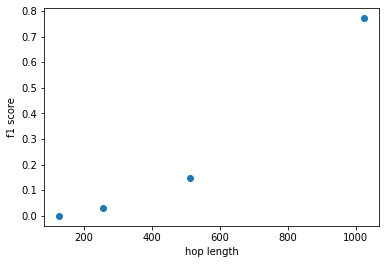

In [40]:
hop_lengths = [128, 256, 512, 1024]

f1_scores = []
for hop_length in hop_lengths:
    onset_frames = librosa.onset.onset_detect(y_harmonic, sr=fs, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1,hop_length = hop_length, backtrack=True)
    onset_times = librosa.frames_to_time(onset_frames)
    _,_,f1 = mir_eval.onset.f_measure(onset_times, notes_times)
    f1_scores.append(f1)

plt.scatter(hop_lengths, f1_scores)
plt.xlabel('hop length')
plt.ylabel('f1 score')

In [38]:
print(len(onset_times))
print(len(notes_times))

228
230


In [ ]:
onset_samples = librosa.frames_to_samples(onset_frames)

In [ ]:
S = librosa.stft(y_harmonic)
logS = librosa.amplitude_to_db(abs(S))

In [ ]:
plt.plot(logS);

In [ ]:
librosa.display.specshow(logS, sr=fs, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [ ]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = np.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(np.diff(onset_samples))   # every segment has uniform frame size
    return np.concatenate([
        np.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [ ]:
concatenated_signal = concatenate_segments(y_harmonic, onset_samples, 0.500)

In [ ]:
ipd.Audio(concatenated_signal, rate=sr)

## Comparing with back tracking

In [ ]:
hop_len = 512
onset_frame_backtrack = librosa.onset.onset_detect(x, sr = fs, hop_length = hop_len, backtrack=True)
print(onset_frame_backtrack)

In [ ]:
onset_time_back_track = librosa.frames_to_time(onset_frame_backtrack, sr = fs, hop_length = hop_len)
print(onset_time_back_track)

In [ ]:
onset_samples_backtrack = librosa.frames_to_samples(onset_frame_backtrack, hop_length=hop_len)
print(onset_samples_backtrack)

In [ ]:
concatenated_signal_bt = concatenate_segments(x, onset_samples_backtrack, 0.500)

In [ ]:
ipd.Audio(concatenated_signal_bt, rate=sr)

In [ ]:
#S = librosa.stft(x)
#logS = librosa.logamplitude(S)
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_time_back_track, 0, 10000, color='k')

### output file for time - DONT RUN

In [ ]:
# https://musicinformationretrieval.com/onset_detection.html

def main():
    file_path = 'guitar.ogg'
    x, sr = librosa.load(file_path)
    onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
    onset_times = librosa.frames_to_time(onset_frames)
    # remove extension, .mp3, .wav etc.
    file_name_no_extension, _ = os.path.splitext(file_path)
    output_name = file_name_no_extension + '.beatmap.txt'
    with open(output_name, 'wt') as f:
        f.write('\n'.join(['%.4f' % onset_time for onset_time in onset_times]))

if __name__ == '__main__':
    main()

# Exploring Frquency Q transform option CQT

In [ ]:
# Parameters
## Signal Processing 
fs = 44100                               # Sampling Frequency
nfft = 2048                              # length of the FFT window: defines the number of bins used for dividing the window into equal strips, or bins. Hence, a bin is a spectrum sample , and defines the frequency resolution of the window. By default : N (Bins) = FFT Size/2
overlap = 0.5                            # Hop overlap percentage
hop_length = int(nfft * (1 - overlap))   # Number of samples between successive frames(CQT col)
n_bins = 72                              # Number of frequency bins starting at f_min
mag_exp = 4                              # Magnitude Exponent
pre_post_max = 6                         # Pre- and post- samples for peak picking
cqt_threshold = -120                     # Threshold for CQT dB levels, all values below threshold are set to -120 dB

In [ ]:
#constant q transform: transform time domain to frequency domain (music notes)
#n_bins per octave is 12 -> bins_oer_octave
#Defaults to C1 ~= 32.70 Hz

def calc_cqt(x,fs=fs,hop_length=hop_length, n_bins=n_bins, mag_exp=mag_exp):
    #using librosa cqt function for the q transform
    C = librosa.cqt(x, sr=fs, hop_length = hop_length, fmin = None, n_bins = n_bins)
    #getting the magnitude (S) ** Magnitude Exponent
    C_mag = librosa.magphase(C)[0] ** mag_exp
    # Convert an amplitude spectrogram to dB-scaled spectrogram.
    CdB = librosa.core.amplitude_to_db(C_mag ,ref=np.max)
    
    return CdB

In [ ]:
# CQT Threshold: below to a value -120 db, at a certain pitch or frequecy

def cqt_thresholded(cqt,thres = cqt_threshold):
    new_cqt=np.copy(cqt)
    new_cqt[new_cqt < thres] = -120
    
    return new_cqt

In [ ]:
# Onset Envelope from Cqt

def calc_onset_env(cqt):
    return librosa.onset.onset_strength(S=cqt, sr=fs, aggregate=np.mean, hop_length=hop_length)

In [ ]:
# Onset from Onset Envelope

def calc_onset(cqt, pre_post_max=pre_post_max, backtrack=True):
    onset_env=calc_onset_env(cqt)
    onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env,
                                           sr=fs, units='frames', 
                                           hop_length=hop_length, 
                                           backtrack=backtrack,
                                           pre_max=pre_post_max,
                                           post_max=pre_post_max)
    
    onset_boundaries = np.concatenate([[0], onset_frames, [cqt.shape[1]]])
    onset_times = librosa.frames_to_time(onset_boundaries, sr=fs, hop_length=hop_length)
    return [onset_times, onset_boundaries, onset_env]

In [ ]:
from ipywidgets import IntSlider, FloatSlider, fixed, Checkbox
from ipywidgets import interactive_output
from ipywidgets import VBox, Label

In [ ]:
# Fine Tuning UI
style = {'description_width': 'initial'}
mag_exp_slider=IntSlider(value = mag_exp, min=1, max=32, step=1, 
                         description='mag_exp:',continuous_update=False)

thres_slider=IntSlider(value=cqt_threshold, min=-120, max=0, step=1, 
                                                     description='Threshold:',continuous_update=False)

pre_post_slider=IntSlider(value=pre_post_max, min=1, max=32, step=1, 
                         description='Pre_post_max:',continuous_update=False, style=style)

backtrack_box=Checkbox(value=False,description='backtrack',disabled=False)


def inter_cqt_tuning(mag_exp,thres,pre_post_max, backtrack):
    thres=thres_slider.value
    mag_exp=mag_exp_slider.value
    pre_post_max=pre_post_slider.value
    backtrack=backtrack_box.value
    global CdB
    CdB = calc_cqt(y_harmonic,fs,hop_length, n_bins, mag_exp)
    plt.figure()
    new_cqt=cqt_thresholded(CdB,thres)
    librosa.display.specshow(new_cqt, sr=fs, hop_length=hop_length, x_axis='time', y_axis='cqt_note', cmap='coolwarm')
    plt.ylim([librosa.note_to_hz('B2'),librosa.note_to_hz('B6')])
    global onsets
    onsets=calc_onset(new_cqt,pre_post_max, backtrack)
    plt.vlines(onsets[0], 0, fs/2, color='k', alpha=0.8)
    plt.title("CQT")
    plt.colorbar()
    plt.show()

In [ ]:
# Display UI
out = interactive_output(inter_cqt_tuning,  {'mag_exp': mag_exp_slider, 'thres': thres_slider, 
                                             'pre_post_max': pre_post_slider, 'backtrack':backtrack_box})
ui = VBox([mag_exp_slider, thres_slider, pre_post_slider, backtrack_box])

In [ ]:
ui

In [ ]:
out

In [ ]:
notes = np.load('notes.npy')
notes

In [ ]:
song= np.load('song.npy')
#3, 81, 33440

In [ ]:
song[0]

In [ ]:
len(notes)

In [ ]:
len(song[0])

# Demucs

In [ ]:
!pip install demucs

# Aubio

In [ ]:
pip install aubio

In [ ]:
import aubio
from aubio import source, onset

def get_onset_times(file_path):
    window_size = 1024 # FFT size
    hop_size = window_size // 4

    sample_rate = 0
    src_func = source(file_path, sample_rate, hop_size)
    sample_rate = src_func.samplerate
    onset_func = onset('default', window_size, hop_size)
    
    duration = float(src_func.duration) / src_func.samplerate

    onset_times = [] # seconds
    while True: # read frames
        samples, num_frames_read = src_func()
        if onset_func(samples):
            onset_time = onset_func.get_last_s()
            if onset_time < duration:
                onset_times.append(onset_time)
            else:
                break
        if num_frames_read < hop_size:
            break
    
    return onset_times